**CHESS USING MINMAX ALGORITHM AND ALPHA BETA PRUNING**

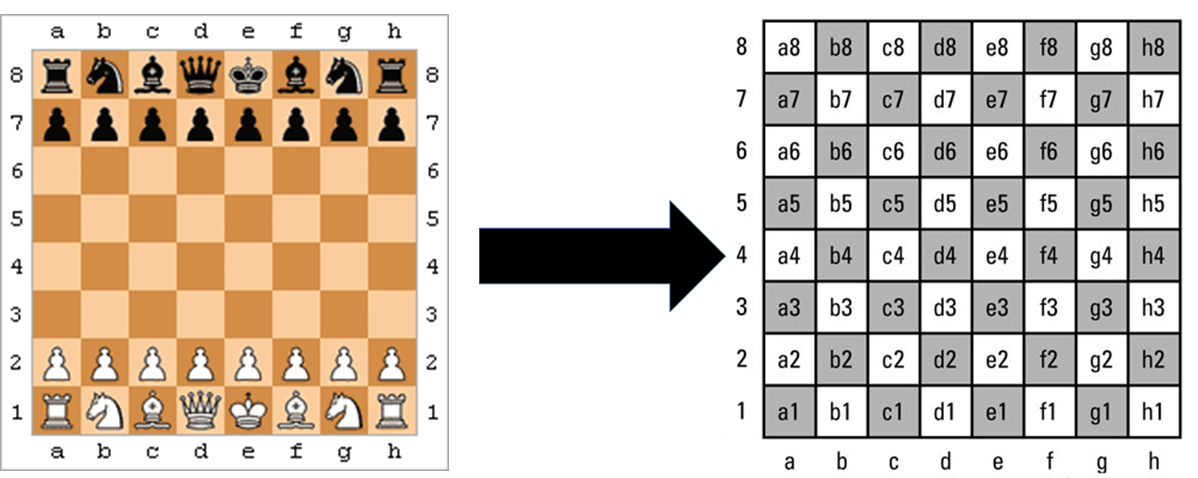

In [ ]:
pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.3 MB/s eta 0:00:00


**1. MINMAX ALGORITHM**

In [ ]:
import chess
import math
import random
import sys

# Define the unicode characters for chess pieces
piece_symbols = {
    'P': '♙', 'p': '♟',
    'N': '♘', 'n': '♞',
    'B': '♗', 'b': '♝',
    'R': '♖', 'r': '♜',
    'Q': '♕', 'q': '♛',
    'K': '♔', 'k': '♚'
}

def print_board(board):
    board_str = str(board)
    for symbol, unicode_char in piece_symbols.items():
        board_str = board_str.replace(symbol, unicode_char)
    print(board_str)

def minimaxRoot(depth, board, isMaximizing):
    possibleMoves = list(board.legal_moves)
    bestMove = -9999
    secondBest = -9999
    thirdBest = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimax(depth - 1, board, not isMaximizing))
        board.pop()
        if value > bestMove:
            print("Best score: ", str(bestMove))
            print("Best move: ", str(bestMoveFinal))
            print("Second best: ", str(secondBest))
            thirdBest = secondBest
            secondBest = bestMove
            bestMove = value
            bestMoveFinal = move
    return bestMoveFinal

def minimax(depth, board, is_maximizing):
    if depth == 0:
        return -evaluation(board)
    possibleMoves = list(board.legal_moves)
    if is_maximizing:
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove, minimax(depth - 1, board, not is_maximizing))
            board.pop()
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board, not is_maximizing))
            board.pop()
        return bestMove

def evaluation(board):
    evaluation = 0
    for i in range(64):
        piece = board.piece_at(i)
        if piece:
            evaluation += getPieceValue(str(piece))
    return evaluation

def getPieceValue(piece):
    if piece is None:
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    return value

def main():
    board = chess.Board()
    n = 0
    print_board(board)
    while n < 100:
        if n % 2 == 0:
            move = input("Enter move: ")
            move = chess.Move.from_uci(str(move))
            if move in board.legal_moves:
                board.push(move)
            else:
                print("Illegal move! Try again.")
                continue
        else:
            print("Computer's Turn:")
            move = minimaxRoot(3, board, True)
            move = chess.Move.from_uci(str(move))
            board.push(move)
            print("Computer played:", move)
        print_board(board)

        if board.is_game_over():
            if board.is_checkmate():
                if n % 2 == 0:
                    print("You won!")
                else:
                    print("Computer won!")
            else:
                print("Draw!")
            break

        n += 1

if __name__ == "__main__":
    main()


♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜
♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙
♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖
Enter move: e2e4
♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜
♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟
. . . . . . . .
. . . . . . . .
. . . . ♙ . . .
. . . . . . . .
♙ ♙ ♙ ♙ . ♙ ♙ ♙
♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖
Computer's Turn:
Best score:  -9999
Best move:  None
Second best:  -9999
Computer played: g8h6
♜ ♞ ♝ ♛ ♚ ♝ . ♜
♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟
. . . . . . . ♞
. . . . . . . .
. . . . ♙ . . .
. . . . . . . .
♙ ♙ ♙ ♙ . ♙ ♙ ♙
♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖


KeyboardInterrupt: Interrupted by user

**2. ALPHA BETA PRUNING**

In [ ]:
import chess
import math
import random
import sys

piece_symbols = {
    'P': '♙', 'p': '♟',
    'N': '♘', 'n': '♞',
    'B': '♗', 'b': '♝',
    'R': '♖', 'r': '♜',
    'Q': '♕', 'q': '♛',
    'K': '♔', 'k': '♚'
}

def minimaxRoot(depth, board,isMaximizing):
    possibleMoves = board.legal_moves
    bestMove = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimax(depth - 1, board,-10000,10000, not isMaximizing))
        board.pop()
        if( value > bestMove):
            print("Best score: " ,str(bestMove))
            print("Best move: ",str(bestMoveFinal))
            bestMove = value
            bestMoveFinal = move
    return bestMoveFinal

def minimax(depth, board, alpha, beta, is_maximizing):
    if(depth == 0):
        return -evaluation(board)
    possibleMoves = board.legal_moves
    if(is_maximizing):
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove,minimax(depth - 1, board,alpha,beta, not is_maximizing))
            board.pop()
            alpha = max(alpha,bestMove)
            if beta <= alpha:
                return bestMove
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board,alpha,beta, not is_maximizing))
            board.pop()
            beta = min(beta,bestMove)
            if(beta <= alpha):
                return bestMove
        return bestMove


def calculateMove(board):
    possible_moves = board.legal_moves
    if len(possible_moves) == 0:
        print("No more possible moves...Game Over")
        sys.exit()
    bestMove = None
    bestValue = -9999
    for x in possible_moves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        boardValue = -evaluation(board)
        board.pop()
        if boardValue > bestValue:
            bestValue = boardValue
            bestMove = move

    return bestMove


def evaluation(board):
    i = 0
    evaluation = 0
    x = True
    try:
        x = bool(board.piece_at(i).color)
    except AttributeError as e:
        x = x
    while i < 63:
        i += 1
        evaluation = evaluation + (getPieceValue(str(board.piece_at(i))) if x else -getPieceValue(str(board.piece_at(i))))
    return evaluation


def getPieceValue(piece):
    if(piece == None):
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    #value = value if (board.piece_at(place)).color else -value
    return value

def main():
    board = chess.Board()
    n = 0
    print(board)
    while n < 100:
        if n%2 == 0:
            move = input("Enter move: ")
            move = chess.Move.from_uci(str(move))
            if move in board.legal_moves:
                board.push(move)
            else:
                print("Illegal move! Try again.")
                continue
        else:
            print("Computers Turn:")
            move = minimaxRoot(3,board,True)
            move = chess.Move.from_uci(str(move))
            board.push(move)
            print("Computer played:", move)

        print(board)

        if board.is_game_over():
            if board.is_checkmate():
                if n%2 == 0:
                    print("You won!")
                else:
                    print("Computer won!")
            else:
                print("Draw!")
            break

        n += 1






if __name__ == "__main__":
    main()

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Enter move: e2e3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R
Computers Turn:
Best score:  -9999
Best move:  None
Computer played: g8h6
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R
